In [1]:
import astropy
# print(astropy.cosmology.realizations.available)

from astropy.cosmology import WMAP9 as wmap
from astropy.cosmology import Planck18 as planck
import pandas as pd

import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
# import healpy as hp

#### Error Between TT Spectrum Data

##### <b> ACT TT Spectra </b>

The $C_l$ spectra are binned, and are given with the following columns:
- the mean multipole moment $l$
- the power spectrum in units of $\mu K^2 C_l$
- the error for the binned value in units of $\mu K^2 C_l$ (the standard deviation of the input data points divided by the square root of their number)

In [23]:
with open('..\\act_data\spectrum_TT.dat', 'r') as file:
    act_tt_data = pd.read_csv(file, sep='\s+', header=None)

type(act_tt_data), act_tt_data.head()

(pandas.core.frame.DataFrame,
        0         1         2
 0  350.5  0.125065  0.015274
 1  400.5  0.061844  0.008171
 2  450.5  0.061938  0.005804
 3  500.5  0.055553  0.005217
 4  550.5  0.051276  0.004034)

In [ ]:
# will have to manually calculate errors and graph that (to be fixed), for now just graphing l vs power spectrum
# Plotting ACT Data
# ax.plot(act_tt_data[0], act_tt_data[1],
#         label = "ACT",
#         color = "m",
#         marker = "o",
#         linestyle = "--",
#         markersize = 5);
# ax.legend(loc = 0)

##### <b> WMAP9 TT Spectra </b>

The complete (unbinned) TT power spectrum data are provided as an ASCII table containing the following columns:
- The multipole moment $l$
- The power spectrum in units of $\mu K^2$
- The error derived from the diagonal elements of the covariance matrix in units of $\mu K^2$
- The portion of column 3 attributed to measurement errors in units of $\mu K^2$
- The portion of column 3 attributed to cosmic variance in units of $\mu K^2$, assuming the best-fit ΛCDM model.

In [82]:
with open('..\wmap_data\Spectral Data\wmap_tt_spectrum_9yr_v5.txt', 'r') as file:
    wmap_tt_data = pd.read_csv(file, sep='\s+', header=None, index_col=0)
    # wmap_tt_data = wmap_tt_data.drop(wmap_tt_data.columns[[0]], axis=1)

type(wmap_tt_data), wmap_tt_data

(pandas.core.frame.DataFrame,
               1          2          3         4
 0                                              
 2      150.6398   708.3154     8.6102  708.2630
 3      902.1805   565.3141     9.6361  565.2320
 4      730.3626   471.9324    10.1917  471.8224
 5     1467.8517   409.7481    10.5276  409.6128
 6      688.5324   366.8310    10.7223  366.6742
 ...         ...        ...        ...       ...
 1196  9375.3164  5655.1530  5654.9683   45.7047
 1197   112.8482  5691.4318  5691.2496   45.5132
 1198  2322.1509  5726.6724  5726.4931   45.3116
 1199 -4873.3315  5775.1737  5774.9969   45.2093
 1200  7194.9780  5811.3539  5811.1797   45.0078
 
 [1199 rows x 4 columns])

In [ ]:
# scrapwork (ignore)
# wmap_tt_mean = wmap_tt_data[2].mean()
# wmap_tt_std = wmap_tt_data[2].std()
# wmap_tt_num = wmap_tt_data[2].count()

# np.random.seed(0)
# # x = wmap_tt_mean + wmap_tt_std*wmap_tt_num
# bin_width = 3.5*wmap_tt_std / wmap_tt_num**(1./3.)
# bins = np.arange(0, wmap_tt_num, 1) # start, stop, step

# wmap_tt_num, len(wmap_tt_data[1]), bin_width, bins

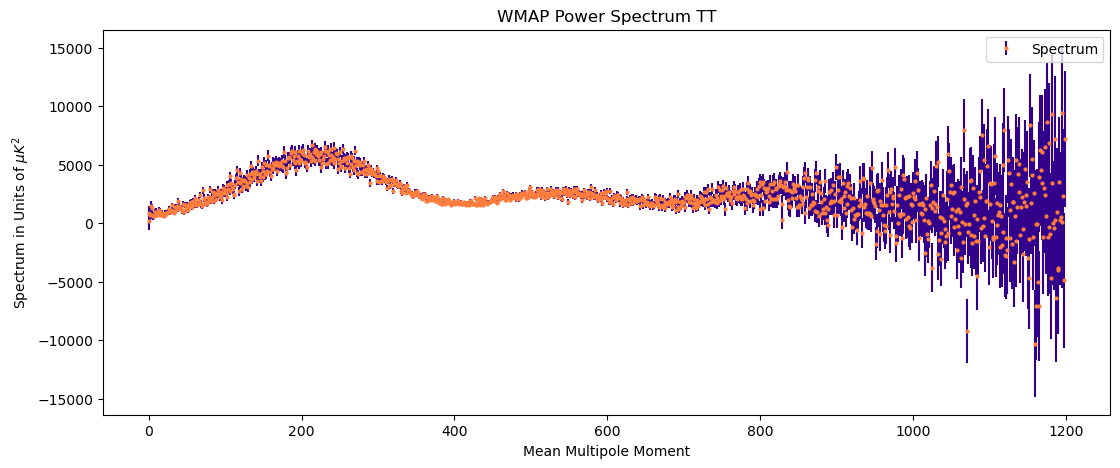

In [83]:
# Plotting WMAP Data
fig, ax = plt.subplots(figsize=(13, 5))

ax.set_xlabel("Mean Multipole Moment")
ax.set_ylabel(r"Spectrum in Units of $\mu K^2$")
ax.set_title("WMAP Power Spectrum TT")

ax.errorbar(np.arange(len(wmap_tt_data[1])), wmap_tt_data[1], yerr=wmap_tt_data[2],
        label = "Spectrum",
        color = "#ff7e3d", 
        ecolor = "#33008c", # colors in RGBA (hex), control alpha/transparency by adding 2 more digits (%tage)
        marker = "o",
        markersize = 2,
        linestyle = "None"); # use lambda as x-axis

ax.legend(loc = 0)

##### <b> Planck TT Spectra </b>

In [ ]:
with open('planck_data\COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt', 'r') as file:
    planck_tt_data = pd.read_csv(file, sep='\s+', header=None)

type(planck_tt_data), planck_tt_data

(pandas.core.frame.DataFrame,
          0             1              2             3             4  \
 0        #             L             TT            TE            EE   
 1        2  0.101673E+04   0.261753E+01  0.308827E-01  0.181847E-05   
 2        3  0.963727E+03   0.293806E+01  0.396903E-01  0.363743E-05   
 3        4  0.912608E+03   0.275866E+01  0.344962E-01  0.606345E-05   
 4        5  0.874477E+03   0.235185E+01  0.230941E-01  0.909717E-05   
 ...    ...           ...            ...           ...           ...   
 2503  2504  0.776127E+02  -0.296537E+01  0.291004E+01  0.000000E+00   
 2504  2505  0.773908E+02  -0.297153E+01  0.291303E+01  0.000000E+00   
 2505  2506  0.771691E+02  -0.297827E+01  0.291609E+01  0.000000E+00   
 2506  2507  0.769485E+02  -0.298537E+01  0.291900E+01  0.000000E+00   
 2507  2508  0.767311E+02  -0.299293E+01  0.292189E+01  0.000000E+00   
 
                  5    6  
 0               BB   PP  
 1     0.501352E-07  NaN  
 2     0.609943E-07  Na

In [81]:
# Plotting Planck Data
# ax.plot(planck_tt_data[1], planck_tt_data[2],
#         label = "Planck",
#         color = "g",
#         marker = "o",
#         linestyle = "--",
#         markersize = 5);
# ax.legend(loc = 0)